# Marketing Campaign A/B Test Analysis 

### **Scenario**
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### **Objective**
- To evaluate the sales performance of three marketing promotions (1, 2, 3) for a new menu item introduced across different market locations.
- To provide data-driven recommendations to a fast-food company aimed at optimizing marketing strategies and improving overall business performance.

### **Source**
- `https://www.kaggle.com/code/chebotinaa/a-b-testing-of-fast-food-marketing-campaign`

## **Step 1: Data Import and Initial Overview**

**Objective:** 
- Establish a foundational understanding of the dataset to guide subsequent analysis.

**Actions:**

**Load and Inspect:**
- Import necessary libraries: `pandas`, `seaborn`, `matplotlib`, `scipy` and `statsmodels`.
- Load the dataset: `data = pd.read_csv()`.
- Preview initial rows: `data.head()`.
- Examine data types: `data.info()`.
- Summarize numerical variables: `data.describe()`.


**Rationale:**

- **Thorough understanding:** This step ensures a thorough understanding of the data's structure, size, and characteristics, which is crucial for subsequent analysis.
- **Informed decision-making:** By understanding the data's limitations and strengths, analysts can make informed decisions about the appropriate analytical techniques and the types of insights that can be extracted.

In [41]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating plots


# Import libraries for statistical tests
from scipy.stats import f_oneway, chi2_contingency  # For performing one-way ANOVA and Chi-Square test
from statsmodels.stats.multicomp import pairwise_tukeyhsd  # For Tukey's HSD test

# Set a theme for the visualizations (customization for plots)
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")  # Adjust plot background for better readability
plt.figure(figsize=(8,6)) # Set the visualizations sizes to be uniform

# Load the dataset
data = pd.read_csv('WA_Marketing-Campaign.csv')  # Assuming the data file is in the same directory

<Figure size 800x600 with 0 Axes>

In [25]:
# Basic Inspection
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [31]:
# Understanding the structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MarketID          548 non-null    int64   
 1   MarketSize        548 non-null    category
 2   LocationID        548 non-null    int64   
 3   AgeOfStore        548 non-null    int64   
 4   Promotion         548 non-null    category
 5   week              548 non-null    int64   
 6   SalesInThousands  548 non-null    float64 
dtypes: category(2), float64(1), int64(4)
memory usage: 22.9 KB


In [37]:
# Descriptive Statistics of the full data set
data.describe()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.500000,53.466204
std,2.877001,287.973679,6.638345,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,4.000000,99.650000


## **Step 1: Data Import and Initial Observations**

**Observations:**

* **Data Types:**
    - `MarketSize`: Should be a categorical variable.
    - `Promotion`: Should be a categorical variable.

* **Data Ranges:**
    - `Promotion`: The 4-week promotion duration might necessitate time-series analysis techniques to understand the impact of the promotion over time.
    - `AgeOfStore`: The store age range is between 1 year (newest) and 28 years (oldest). The wide range of store ages suggests potential variations in sales performance due to store maturity and customer base.


---
## **Step 2: Data Cleaning**

**Objective:** 

- Ensure data quality and integrity for reliable analysis.

**Actions:**

1. **Handle Missing Values:**
    - **Identify Missing Values:** `data.isnull().sum()`.
    - **Handle Missing Data:**
        - **Imputation:** For numerical variables, methods like mean/median imputation.
        - **Removal:** If missing values are significant or patterns suggest data bias, removing rows or columns with a high percentage of missing values. 

2. **Identify and Handle Duplicates:**
    - **Identify Duplicates:** `data.duplicated().sum()`.
    - **Remove Duplicates:** `data = data.drop_duplicates()`.

3. **Data Consistency Checks:**
    - **Check for invalid values:** 
        - For example, negative values for variables that should only be positive.
        - Correct or remove invalid values based on domain knowledge.
    - **Ensure consistent formatting:** 
        - Convert data types as needed (convert categorical variables).

**Rationale:**

- **Data Quality:** Clean data is essential for accurate and reliable analysis. Missing values and inconsistencies can introduce bias and lead to misleading results.
- **Robust Analysis:** By addressing data quality issues early on, you ensure that your analysis is built on a solid foundation, leading to more accurate and trustworthy insights.
- **Improved Decision-Making:** Clean data enables you to make more informed business decisions based on reliable and accurate information.

In [28]:
# Check for missing values
data.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [29]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [3]:
# Data preparation - Changing 'MarketSize' and 'Promotion' columns into a category datatype 
data['MarketSize'] = data['MarketSize'].astype('category')
data['Promotion'] = data['Promotion'].astype('category')

In [45]:
# Check for invalid values in 'MarketSize'
invalid_market_sizes = data[~data['MarketSize'].isin(['Small', 'Medium', 'Large'])]
if not invalid_market_sizes.empty:
    print(invalid_market_sizes)
    
# Check for invalid values in 'Promotion'
invalid_promotion = data[~data['Promotion'].isin(['1', '2', '3'])]
if not invalid_market_sizes.empty:
    print(invalid_market_sizes)
   

## **Step 2: Data Cleaning Observations**

* **Missing Values:** No missing values were found in the dataset.
* **Duplicates:** No duplicate rows were found in the dataset.
* **Data Consistency:** 
    - **Categorical Variables:** All values within categorical variables appear to be valid and consistent. 

**Conclusion:**

The initial data quality check indicates that the dataset is relatively clean and ready for further analysis.

---
## **Step 3: Initial Analysis**

**Objective:** Understand the distribution and relationships between key variables in the dataset. Visualize when necessary.

**Actions:**

1. **Univariate Analysis:**
    - **Categorical Variables:**
        - Calculate frequency counts with: `.value_counts()`, visualize with `matplotlib.pyplot.pie()`.
        - Analyze the distribution of categorical variables.
    - **Numerical Variables:**
        - Visualize distributions using histograms: `seaborn.histplot()`.
        
2. **Bivariate Analysis:**
    - **Explore relationships between variables:**
        - **Categorical vs. Numerical:** 
            - Create a bar plot to visualize the relationship between two variables: `seaborn.barplot()`.
            - Calculate distribution of a categorical variable within a numerical variable with: `.groupby()`.
        - **Numerical vs. Numerical:**
            - Create a box plot to visualize the distribution and identify potential outliers with: `seaborn.boxplot()`.
            - Calculate and interpret summary statistics: `.describe()`.
            - Calculate correlation coefficients using `data.corr()`.
            - Visualize correlations using a heatmap with: `seaborn.heatmap(data.corr()`.
        - **Time Series**
            - Create a line plot to evaluate trends over time with: `seaborn.lineplot()`.
        - **Categorical vs. Categorical**
            - `crosstab()`: Create a contingency table to summarize the frequencies of observations in each combination of categories.
            - Chi-square test: Determine whether there is a statistically significant association between the two variables.
            - Determine whether the variables are independent or associated.

**Rationale:**

- **Understand Variable Distributions:** Univariate analysis helps to understand the distribution and characteristics of individual variables, such as central tendency, dispersion, and skewness.
- **Identify Relationships:** Bivariate analysis helps to identify potential relationships and dependencies between variables. This information is crucial for further analysis and model building.
- **Visual Exploration:** Visualizations provide a quick and intuitive way to understand the data and identify potential patterns and anomalies.


### **Step 3: Univariate Analysis Section**

In [17]:
# Univariate Analysis
# Categorical Variables - Frequency count
market_size_count = data['MarketSize'].value_counts()

# Calculate percentages
market_size_percentages = ((market_size_count / market_size_count.sum()) * 100).round(2)

# Create a new DataFrame with counts and percentages
market_size_summary = pd.DataFrame({'MarketSize': market_size_count.index, 
                                   'Count': market_size_count.values, 
                                   'Percentage': market_size_percentages.values})

market_size_summary

,MarketSize,Count,Percentage
0,Medium,320,58.39
1,Large,168,30.66
2,Small,60,10.95


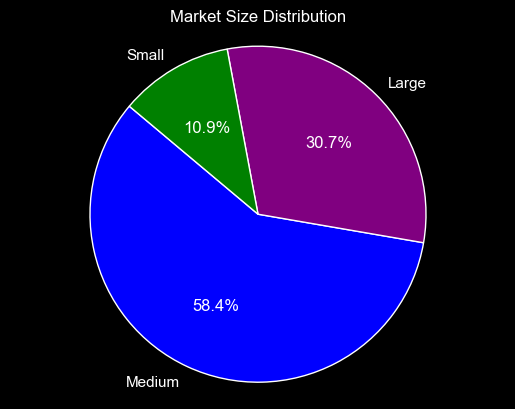

In [42]:
# Univariate Analysis
# Calculate market size counts
market_size_count = data['MarketSize'].value_counts()

# Create the pie chart
plt.pie(market_size_counts, labels=market_size_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'purple', 'green']) 
plt.title("Market Size Distribution")
plt.axis('equal') 
plt.show()

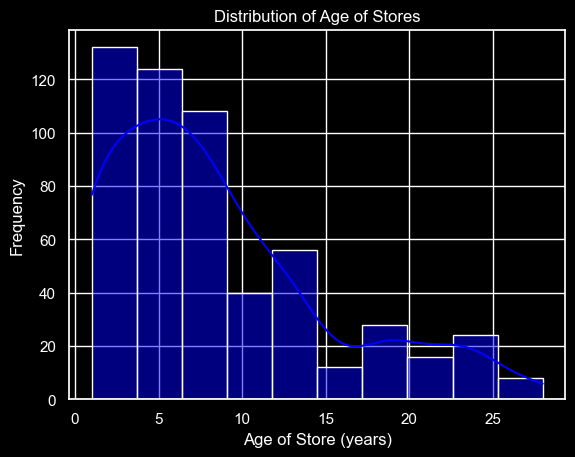

In [43]:
# Univariate Analysis
# Numerical Variables - Histogram of 'AgeOfStore'
sns.histplot(data['AgeOfStore'], bins=10, kde=True, color='blue')
plt.title("Distribution of Age of Stores")
plt.xlabel("Age of Store (years)")
plt.ylabel("Frequency")
plt.show()

### **Step 3: Univariate Analysis Observations**
-  **MarketSize:** Medium market size stores represent the largest proportion of the dataset. 
- **AgeOfStore:** The majority of stores are relatively new, with a significant proportion falling within the first few years of operation (skewed left).


### **Step 3: Bivariate Analysis Section**

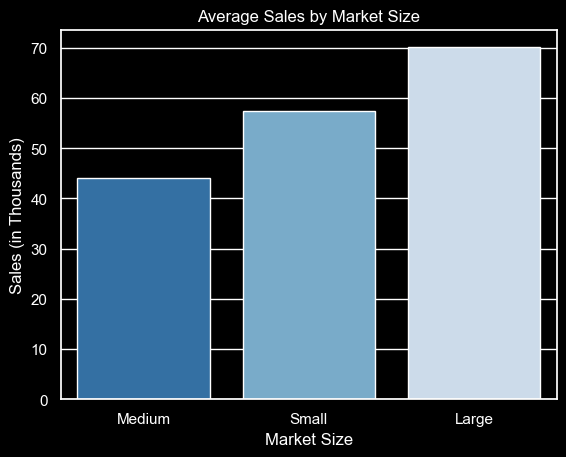

In [50]:
# Bivariate Analysis
# Categorical vs. Numerical - Barplot of 'MarketSize' and 'SalesInThousands'
sns.barplot(data=data, 
            x='MarketSize', 
            y='SalesInThousands', 
            errorbar=None, 
            hue="MarketSize", 
            palette="Blues_r")
plt.title("Average Sales by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Sales (in Thousands)")
plt.show()

In [70]:
# Bivariate Analysis
# Categorical Vs. Numerical - Distribution of Sales within each Promotion
# Group by 'Promotion' and calculate total sales for each group
grouped_data = data.groupby('Promotion')['SalesInThousands'].sum().reset_index()

# Calculate total sales across all promotions
total_sales = grouped_data['SalesInThousands'].sum()

# Calculate percentage of total sales for each promotion
grouped_data['Percentage'] = (grouped_data['SalesInThousands'] / total_sales) * 100
grouped_data['Percentage'] = grouped_data['Percentage'].round(2) 

print(grouped_data)

   Promotion  SalesInThousands  Percentage
0          1           9993.03       34.11
1          2           8897.93       30.37
2          3          10408.52       35.52


In [90]:
median_sales = data.groupby('Promotion')['SalesInThousands'].mean().reset_index()
median_sales

,Promotion,SalesInThousands
0,1,58.099012
1,2,47.329415
2,3,55.364468


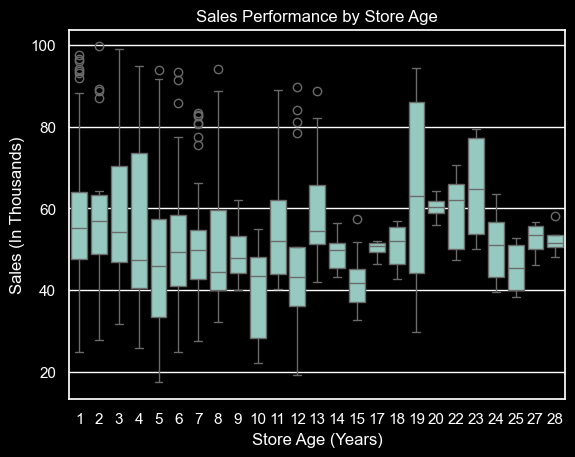

In [45]:
# Bivariate Analysis
# Numerical vs. Numerical Variables - Boxplot of 'SalesInThousands' and 'AgeOfStore'
sns.boxplot(data=data, x='AgeOfStore', y='SalesInThousands')
plt.title("Sales Performance by Store Age")
plt.xlabel("Store Age (Years)")
plt.ylabel("Sales (In Thousands)")
plt.show()

In [76]:
# Descriptive statistics of 'SalesInThousands'
data['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

In [60]:
# Descriptive statistics of 'AgeOfStore'
data['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

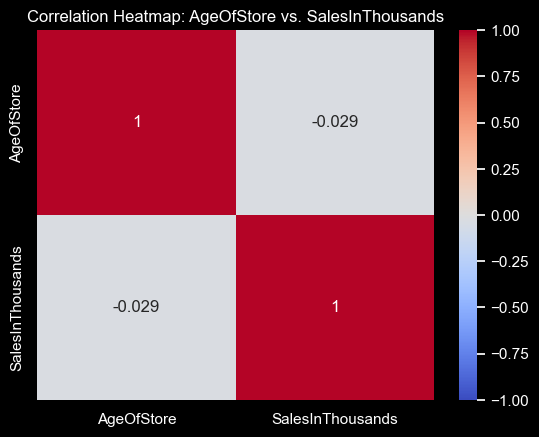

In [71]:
# Bivariate Analysis - Heatmap of 'AgeOfStore' and 'SalesInThousands'
# Calculate the correlation matrix 
correlation_matrix = data[['AgeOfStore', 'SalesInThousands']].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: AgeOfStore vs. SalesInThousands')
plt.show()

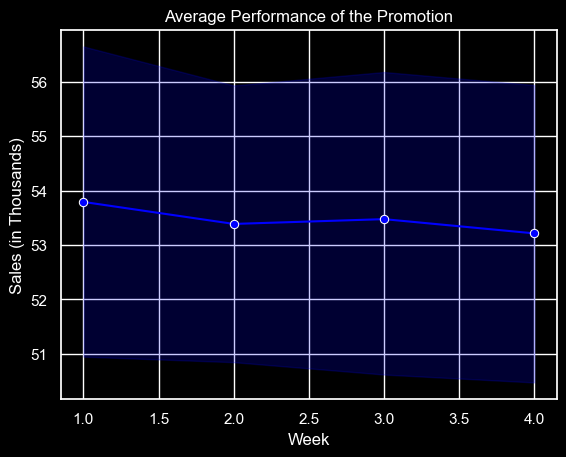

In [51]:
# Bivariate Analysis
# Time Series - Line plot of 'Week' and 'SalesInThousands'
sns.lineplot(data=data, x='week', y='SalesInThousands', marker="o", color="blue")
plt.title("Average Performance of the Promotion")
plt.xlabel("Week")
plt.ylabel("Sales (in Thousands)")
plt.show()

In [72]:
# Bivariate Analysis
# Categorical vs. Categorical - Contingency table of 'MarketSize' and 'Promotion'
contingency_table = pd.crosstab(data['MarketSize'], data['Promotion'])

# Calculate percentage distribution of promotions within each market size
percentage_distribution = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Display the percentage distribution
percentage_distribution

Promotion,1,2,3
MarketSize,,,
Large,33.333333,38.095238,28.571429
Medium,30.000000,33.750000,36.250000
Small,33.333333,26.666667,40.000000


In [75]:
# Perform chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected_freq)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant association between MarketSize and Promotion.")
else:
    print("There is no statistically significant association between MarketSize and Promotion.")

Chi-square statistic: 4.753891284371245
p-value: 0.3134943324468101
Degrees of freedom: 4
Expected frequencies:
 [[ 52.72992701  57.6350365   57.6350365 ]
 [100.4379562  109.7810219  109.7810219 ]
 [ 18.83211679  20.58394161  20.58394161]]
There is no statistically significant association between MarketSize and Promotion.


### **Step 3: Bivariate Analysis Observations**
- **MarketSize:** Medium market size has the highest number of stores, but the mean sales are higher in Small and Large market size stores, suggesting potential market saturation or other factors influencing sales in Medium markets.

- **Promotion Performance:** Promotion 3 generated the highest sales, contributing 35.52% to the total sales. Sales performance may have declined over the promotion weeks, requiring further investigation into potential causes.

- **AgeOfStore:** A weak negative correlation (correlation coefficient: -0.029) was observed between 'AgeOfStore' and 'SalesInThousands', suggesting a slight tendency for older stores to have lower sales, although this relationship is weak. 

- **SalesInThousands:** Sales range from \$17,340 to \$99,650, with a median of \$53,460. 

- **MarketSize & Promotion:** The chi-square test revealed no statistically significant association between 'MarketSize' and 'Promotion', indicating that the distribution of promotions is consistent across different market sizes.


## **Step 4: Multivariate Analysis and A/B Statistical Test**

**Objective:** 

- To determine if there are statistically significant differences in the sales performance across the 3 different promotion types.

**Actions:**

1. **Multivariate Analysis:**
    - **Line Plot Analysis:**
        - **Explore the combined effect of multiple variables with:`seaborn.lineplot()`.**
            - Create line plots to visualize the sales trends over time for each promotion.
            - Look for variations in the slope of the lines, indicating differences in sales growth rates across promotions.

    - **ANOVA (Analysis of Variance):**
        - **This test determines if there are statistically significant differences in the mean sales across the different promotion types.**
            - Use the `f_oneway()` function in Python's SciPy library to calculate the F-statistic and p-value.
            - **Null Hypothesis:** Mean sales are the same across all promotions.
            - **Alternative Hypothesis:** At least one promotion has different mean sales.
        - **Interpretation:** If the p-value is less than the significance level (0.05), reject the null hypothesis and conclude that there are statistically significant differences in mean sales across at least one pair of promotions.

    - **Tukey's HSD (Honestly Significant Difference) Test:**
        - **This post-hoc test identifies which specific pairs of promotions have significantly different mean sales when the ANOVA result is significant.** 
            - Use the `pairwise_tukeyhsd()` function from the SciPy statsmodels library to perform the test.
            - This helps pinpoint which promotions have significantly higher or lower mean sales compared to others.

**Rationale:**

* **Multivariate Analysis:** 
    - By analyzing the combined effect of multiple variables ('Promotion' and 'week'), we can gain a deeper understanding of the sales trends and identify potential interactions between these factors. 
    - Line plots provide a visual representation of these trends, making it easier to identify patterns and anomalies.

* **ANOVA:** 
    - ANOVA is a powerful statistical technique for comparing the means of multiple groups. 
    - It helps to determine if there are any statistically significant differences in sales performance across the different promotion types.

* **Tukey's HSD Test:** 
    - If ANOVA indicates a significant difference, Tukey's HSD test helps to pinpoint which specific promotions are driving those differences. 
    - This provides more specific insights into the relative performance of each promotion and guides targeted improvement efforts.

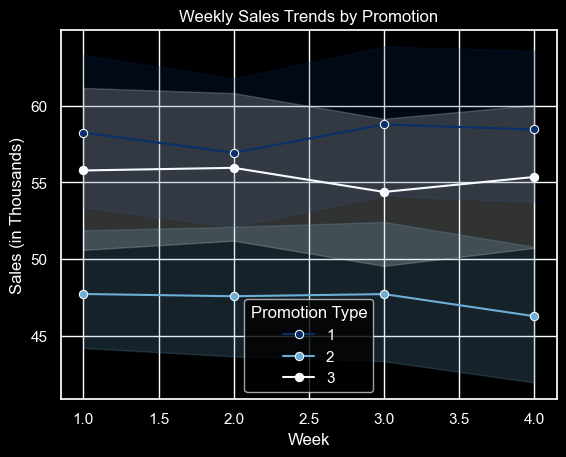

In [82]:
#Multivariate Analysis of 'week', 'SalesInThousands' and 'Promotion'
# Weekly Sales Trends by Promotion
sns.lineplot(
    data=data,
    x="week",
    y="SalesInThousands",
    hue="Promotion",
    palette="Blues_r",
    marker="o"
)
plt.title("Weekly Sales Trends by Promotion")
plt.xlabel("Week")
plt.ylabel("Sales (in Thousands)")
plt.legend(title="Promotion Type")
plt.show()

                    AgeOfStore  SalesInThousands     Promotion          week
AgeOfStore        1.000000e+00         -0.028533  5.976484e-02  5.185353e-17
SalesInThousands -2.853288e-02          1.000000 -5.921195e-02 -1.098354e-02
Promotion         5.976484e-02         -0.059212  1.000000e+00  4.034370e-17
week              5.185353e-17         -0.010984  4.034370e-17  1.000000e+00


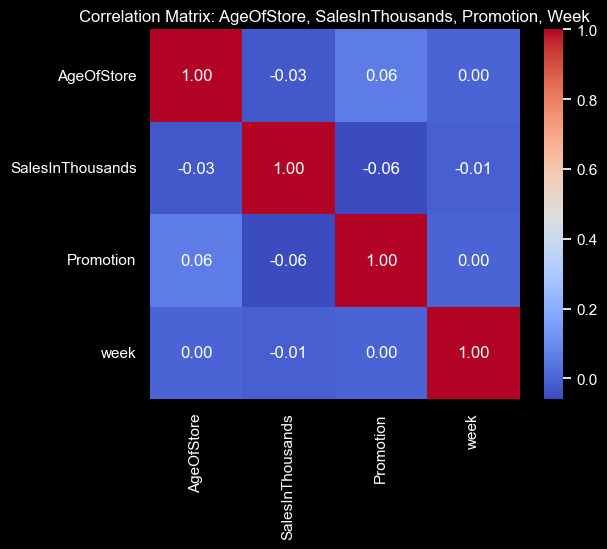

In [ ]:
# Multivariate Analysis - Correlation Matrix of 'AgeOfStore', 'SalesInThousands', 'Promotion', 'week'
# Selecting relevant columns for correlation analysis
columns = data[['AgeOfStore', 'SalesInThousands', 'Promotion', 'week']]

# Calculating the correlation matrix
correlation_matrix = columns.corr()
print(correlation_matrix)

# Visualizing the correlation matrix
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap="coolwarm",  # Color palette
    fmt=".2f",  # Format for numbers
    cbar=True,  # Include color bar
    square=True  # Make heatmap cells square
)
plt.title("Correlation Matrix: AgeOfStore, SalesInThousands, Promotion, Week")
plt.show()

In [36]:
# ANOVA Test
anova_results = f_oneway(
    data[data['Promotion'] == 1]['SalesInThousands'],
    data[data['Promotion'] == 2]['SalesInThousands'],
    data[data['Promotion'] == 3]['SalesInThousands']
)
anova_results

F_onewayResult(statistic=np.float64(21.953485793080677), pvalue=np.float64(6.765849261408714e-10))

### ANOVA Results
- F-Statistic: 21.95
- p-value: 6.77e-10

#### Interpretation

- The p-value is significantly lower than 0.05, indicating that there is a statistically significant difference in sales performance across the three promotions.

In [11]:
# Tukey's HSD Test
tukey_result = pairwise_tukeyhsd(
    endog=data['SalesInThousands'],
    groups=data['Promotion'],
    alpha=0.05
)
tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


### Tukey’s Post-Hoc Test Results
- Significant differences:
	- Promotion 1 vs. Promotion 2: Significant (p-adj = 0.0000), with Promotion 1 having higher sales.
	- Promotion 2 vs. Promotion 3: Significant (p-adj = 0.0000), with Promotion 3 having higher sales.
- No significant difference:
	- Promotion 1 vs. Promotion 3: Not significant (p-adj = 0.2444).


## **Step 5: Conclusion**

**Key Findings:**

* **Market Analysis:** 
    - Medium market size stores dominate the dataset, but smaller and larger markets exhibit higher average sales, suggesting potential market saturation or untapped opportunities in medium-sized markets.
    - The majority of stores are relatively new, indicating a potentially growing market. The slightly negative correlation between 'AgeOfStore' and 'SalesInThousands' suggests a potential need to address performance decline in older stores.

* **Sales Performance & Promotion Analysis:**
    - Sales range significantly, from \$17,340 to \$99,650, with a median of \$53,460, indicating a wide variation in store performance. 
    - Promotion 3 demonstrated the highest sales performance, contributing 35.52% to the total sales, although Promotion 1 had higher median sales throughout the promotion period.
    - ANOVA analysis revealed statistically significant differences in sales performance across the three promotions. 
    - Tukey's HSD test reveals that promotion 1 and promotion 3 have no significant difference in mean sales. This suggests that while Promotion 3 had the highest overall sales, its performance may not be significantly different from Promotion 1.
    - Promotion 2 appears to be significantly less effective than both Promotion 1 and Promotion 3 based on the Tukey's HSD test results.
    - The initial analysis suggests a potential decline in sales performance over the promotion weeks. 
    - The chi-square test indicated no significant association between 'MarketSize' and 'Promotion' distribution, suggesting the effectiveness of promotions might be consistent across market sizes.
    - Re-evaluate Promotion 2 by analyzing the reasons for its lower performance. 

**Recommendations:**

- **Optimize High-Performing Promotions:** 
    - Implement and expand the use of Promotion 1 and 3 across all market sizes, given their superior performance.
    - Conduct further analysis to identify the key drivers of Promotion 1 and 3's success and replicate those elements in other promotions.

- **Address Market Size Variations:**
    - Investigate the factors contributing to higher sales in Small and Large markets.
    - Develop targeted marketing strategies for each market size to optimize performance.

- **Analyze Sales Trends:**
    - Conduct further analysis of the sales trends over the promotion weeks to understand the reasons for the potential decline and implement strategies to mitigate this trend.

- **Continuous Monitoring:** 
    - Continuously monitor sales performance and conduct A/B testing on different promotion durations and strategies to optimize campaign effectiveness.

**Limitations:**

- This analysis is based on a limited set of variables. 
- External factors such as economic conditions and seasonality that may influence sales were not considered.
- Further investigation is needed to confirm the observed trends and make more robust conclusions.